In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df_sales = pd.read_csv('sales_train_v2.csv')
df_sales['date'] = pd.to_datetime(df_sales['date'],  dayfirst=True)

In [54]:
# Neplace negative price with mean

mean = int(df_sales.loc[df_sales['item_id']==2973, 'item_price'].mean())
df_sales["item_price"] = df_sales["item_price"].mask(df_sales["item_price"] <0, mean)

In [55]:
# Get sales data only for items had sales after 2015-05-01
df_sales_recent = df_sales[df_sales.date>'2015-05-01']
df_item1 = df_sales_recent.drop(['date', 'date_block_num','shop_id','item_price','item_cnt_day'], axis=1)
df_item2=df_item1.drop_duplicates()
df_sales_recent_6m = pd.merge(left=df_item2,right=df_sales, how='left', left_on='item_id', right_on='item_id')
df_sales_recent_6m


,item_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,15710,2013-04-30,3,25,349.0,1.0
1,15710,2013-04-27,3,25,349.0,4.0
2,15710,2013-04-26,3,25,349.0,1.0
3,15710,2013-04-25,3,25,349.0,2.0
4,15710,2013-04-27,3,21,349.0,1.0
...,...,...,...,...,...,...
2118718,7610,2015-10-29,33,25,2890.0,1.0
2118719,7635,2015-10-22,33,25,2100.0,1.0
2118720,7638,2015-01-18,24,25,1660.0,1.0
2118721,7638,2015-10-30,33,25,1890.0,1.0


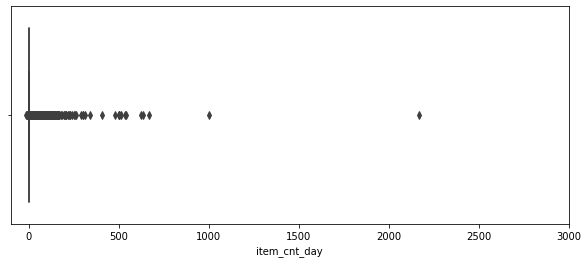

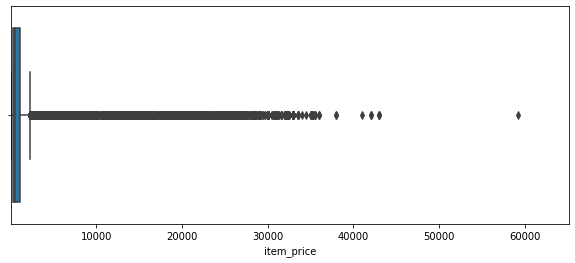

In [56]:
# Outlier exploration
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_sales_recent_6m.item_cnt_day)

plt.figure(figsize=(10,4))
plt.xlim(df_sales_recent_6m.item_price.min(), df_sales_recent_6m.item_price.max()*1.1)
sns.boxplot(x=df_sales_recent_6m.item_price)

In [57]:
# Remove outliers on Price
# Sales data for all items that have sales in the last 6 months
df_sales_clean_all_items = df_sales_recent_6m[df_sales_recent_6m.item_price<40000]
df_sales_clean_all_items

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,15710,2013-04-30,3,25,349.0,1.0
1,15710,2013-04-27,3,25,349.0,4.0
2,15710,2013-04-26,3,25,349.0,1.0
3,15710,2013-04-25,3,25,349.0,2.0
4,15710,2013-04-27,3,21,349.0,1.0
...,...,...,...,...,...,...
2118718,7610,2015-10-29,33,25,2890.0,1.0
2118719,7635,2015-10-22,33,25,2100.0,1.0
2118720,7638,2015-01-18,24,25,1660.0,1.0
2118721,7638,2015-10-30,33,25,1890.0,1.0


In [59]:
# Sales data only for old items (new items that launched in recent 6 months are excluded )
df_sales_old = df_sales[df_sales.date<'2015-05-01']
df_item_old = df_sales_old.drop(['date', 'date_block_num','shop_id','item_price','item_cnt_day'], axis=1)
df_item3=df_item_old.drop_duplicates()
df_item3=df_item3.reset_index(drop=True)
old_items=pd.merge(df_item2, df_item3, on='item_id', how='inner')
df_sales_clean_old_items = pd.merge(left=old_items,right=df_sales, how='left', left_on='item_id', right_on='item_id')
df_sales_clean_old_items = df_sales_clean_old_items[df_sales_clean_old_items.item_price<40000]
df_sales_clean_old_items

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,15710,2013-04-30,3,25,349.0,1.0
1,15710,2013-04-27,3,25,349.0,4.0
2,15710,2013-04-26,3,25,349.0,1.0
3,15710,2013-04-25,3,25,349.0,2.0
4,15710,2013-04-27,3,21,349.0,1.0
...,...,...,...,...,...,...
2041716,7590,2014-12-31,23,25,1425.0,1.0
2041717,7590,2015-02-12,25,25,1140.0,1.0
2041718,7590,2015-10-22,33,25,1625.0,1.0
2041719,7638,2015-01-18,24,25,1660.0,1.0


In [50]:
# Sales data only for new items that got launched in the last 6 months 
df_item4=df_item2.merge(old_items, 'outer', indicator=True).query('_merge == "left_only"')
df_item4=df_item4.drop(['_merge'], axis=1)
df_item4=df_item4.reset_index(drop=True)
new_items=pd.merge(df_item2, df_item4, on='item_id', how='inner')
df_sales_clean_new_items = pd.merge(left=new_items,right=df_sales, how='left', left_on='item_id', right_on='item_id')
df_sales_clean_new_items = df_sales_clean_new_items[df_sales_clean_new_items.item_price<40000]
df_sales_clean_new_items

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day
0,16844,2015-05-27,28,19,599.0,1.0
1,16844,2015-05-26,28,16,599.0,1.0
2,16844,2015-05-31,28,16,599.0,1.0
3,16844,2015-05-22,28,21,599.0,1.0
4,16844,2015-05-30,28,21,599.0,1.0
...,...,...,...,...,...,...
76989,8428,2015-10-17,33,25,249.0,1.0
76990,7903,2015-10-01,33,25,12198.0,1.0
76991,7610,2015-10-29,33,25,2890.0,1.0
76992,7635,2015-10-22,33,25,2100.0,1.0
